In [12]:
# plot 작업시 토치와 부딪힘. 현상 제거
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [13]:

#### -- 1-1. 모듈 불러오기 -- ####
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
# from torch.autograd import Variable

from matplotlib import pyplot as plt
#%matplotlib inline

In [14]:
#### -- 1-2. 분석 환경 설정 -- ####
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

print ('Current cuda device is', device)

Current cuda device is cuda


### https://wikidocs.net/157285
Pytorch는 이미지 분류, segmentation, 텍스트 처리, object Identification과 같은 다양한 작업에 광범위하게 사용되는 딥 러닝 프레임워크입니다. 이러한 경우 다양한 유형의 데이터를 처리해야 합니다. 그리고 대부분의 경우 데이터가 데이터가 항상 머신러닝 알고리즘 학습에 필요한 최종 처리가 된 형태로 제공되지는 않습니다. transform 을 해서 데이터를 조작하고 학습에 적합하게 만들어야 합니다.

- PyTorch의 torchvision 라이브러리는 transforms 에서 다양한 변환 기능을 제공합니다.
- train_data = datasets.CIFAR10(root = './data', train = True, download = True, transform = transforms.ToTensor())
    - root 는 학습/테스트 데이터가 저장되는 경로입니다.
    - train 은 학습용 또는 테스트용 데이터셋 여부를 지정합니다.
    - download=True 는 root 에 데이터가 없는 경우 인터넷에서 다운로드합니다.
    - transform 과 target_transform 은 특징(feature)과 정답(label) 변형(transform)을 지정합니다.</p>
<p>
- transform을 사용하여 데이터의 일부 조작을 수행하고 훈련에 적합하게 만들 수 있습니다.

    - transforms.ToTensor() - 넘파이 데이터를 tensor로 바꿔준다.
    - transforms.Normalize(mean, std, inplace=False) - 정규화한다.
    - transforms.ToPILImage() - csv 파일로 데이터셋을 받을 경우, PIL image로 바꿔준다.
    - transforms.Compose - 여러 단계로 변환해야 하는 경우, Compose를 통해 여러 단계를 묶을 수 있다. </p>
    
-

In [17]:
# 넘파이 자료를 텐서형식의 자료로 변환함(transforms.ToTensor())
# 작업폴더의 data\\cifa10 폴더에ㅐ 자료 다운로드
train_data = datasets.CIFAR10(root = '.\\data\\cifa10', train = True, download = True, transform = transforms.ToTensor())
test_data = datasets.CIFAR10(root = '.\\data\\cifa10', train = False, transform = transforms.ToTensor())

print('number of training data: ', len(train_data))
print('number of test data: ', len(test_data))


Files already downloaded and verified
number of training data:  50000
number of test data:  10000


In [18]:
import numpy as np
print(train_data)
print('-'*50)
print(test_data)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: .\data\cifa10
    Split: Train
    StandardTransform
Transform: ToTensor()
--------------------------------------------------
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: .\data\cifa10
    Split: Test
    StandardTransform
Transform: ToTensor()


torch.Size([3, 32, 32])


Text(0.5, 1.0, 'classNumber: 6')

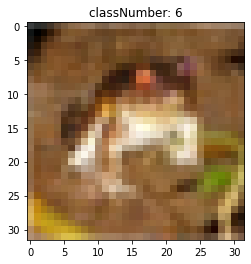

In [44]:
# 샘플이미지 출력
image, label = train_data[0]
print(image.shape)   # 출력하면 3,32,32 가 나옴 
plt.imshow(np.transpose(image, (1, 2, 0)))   # 32,32,0으로 변경하는 작업임
plt.title('classNumber: '+ str(label))

In [ ]:
#### -- 1-3. Hyper-parameter 지정 -- ####
batch_size = 50
learning_rate = 0.0001
epoch_num = 15

In [54]:
#### -- 2-3. Mini-Batch 구성하기 -- ####
train_loader = torch.utils.data.DataLoader(dataset = train_data, 
                                           batch_size = batch_size, shuffle = True)
test_loader  = torch.utils.data.DataLoader(dataset = test_data, 
                                           batch_size = batch_size, shuffle = True)

first_batch = train_loader.__iter__().__next__()

In [55]:
# 배치사이즈만큼 자료를 읽어온걸 확인하고자함.
len(first_batch), first_batch[0].shape, first_batch[1].shape

(2, torch.Size([50, 3, 32, 32]), torch.Size([50]))

In [56]:
print('{:15s} | {:<25s} | {}'.format('name', 'type', 'size'))
print('{:15s} | {:<25s} | {}'.format('Num of Batch', '', len(train_loader)))
print('{:15s} | {:<25s} | {}'.format('first_batch', str(type(first_batch)), len(first_batch)))
print('{:15s} | {:<25s} | {}'.format('first_batch[0]', str(type(first_batch[0])), first_batch[0].shape))
print('{:15s} | {:<25s} | {}'.format('first_batch[1]', str(type(first_batch[1])), first_batch[1].shape))

name            | type                      | size
Num of Batch    |                           | 1000
first_batch     | <class 'list'>            | 2
first_batch[0]  | <class 'torch.Tensor'>    | torch.Size([50, 3, 32, 32])
first_batch[1]  | <class 'torch.Tensor'>    | torch.Size([50])


X_train: torch.Size([50, 3, 32, 32]) type: torch.FloatTensor
y_train: torch.Size([50]) type: torch.LongTensor


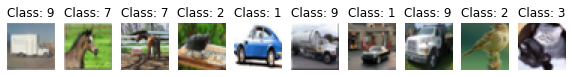

In [61]:
## 참고: 데이터 확인

for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i], (1, 2, 0)))
    plt.title('Class: ' + str(y_train[i].item()))

###  참고  손글씨 mnist 로
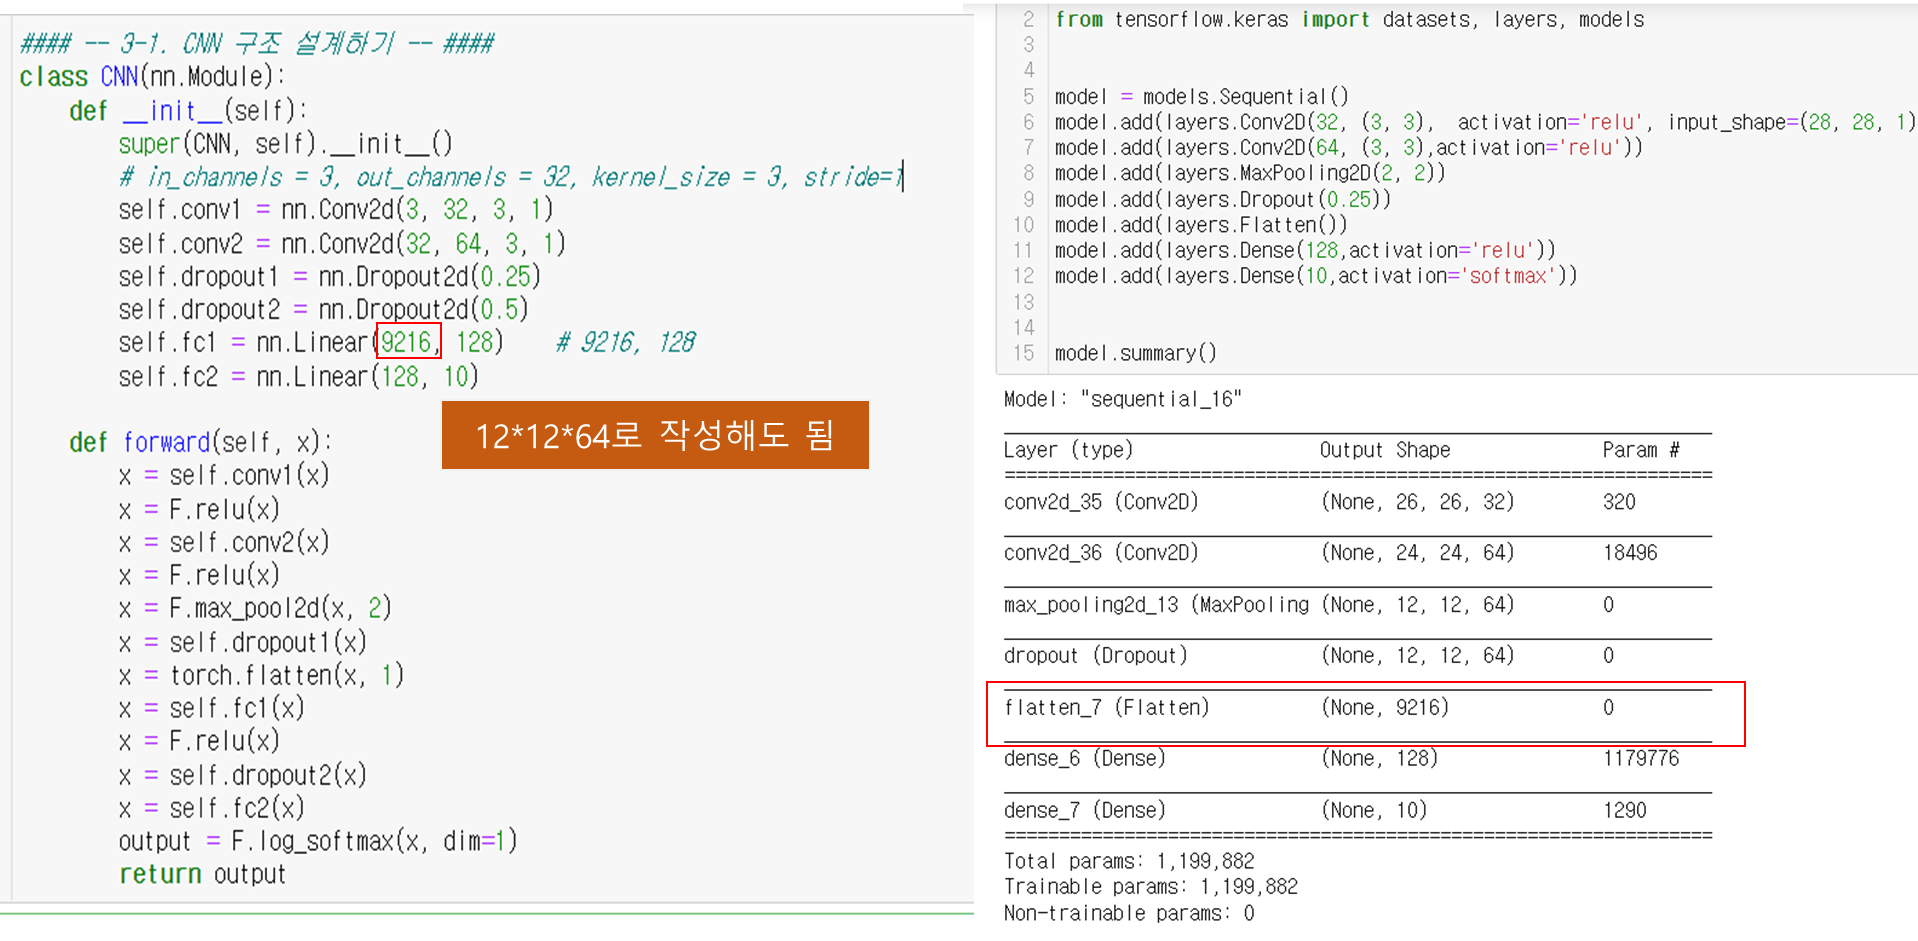

In [124]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 8, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 3, padding = 1)
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.fc1 = nn.Linear(8 * 8 * 16, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        
        #  크기조정(torch.view는 numpy의 reshape)임
        x = x.view(-1, 8 * 8 * 16)  
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x)
        return x

In [147]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # 사이즈가 -1로 설정되면 다른 차원으로 부터 해당 값을 유추
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [125]:
#### -- 3-2. Optimizer 및 손실함수 정의 -- ####
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss( )

In [126]:
print(model)

CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)


In [148]:
model.train()
i = 1
for epoch in range(epoch_num):
    for data, target in train_loader:
        data = data.to(device)
        target = target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if i % 1000 == 0:
            print('Train Step: {}\tLoss: {:.3f}'.format(i, loss.item()))
        i += 1

C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Step: 1000	Loss: 1.559
Train Step: 2000	Loss: 1.783
Train Step: 3000	Loss: 1.610
Train Step: 4000	Loss: 1.514
Train Step: 5000	Loss: 1.279
Train Step: 6000	Loss: 1.386
Train Step: 7000	Loss: 1.414
Train Step: 8000	Loss: 1.518
Train Step: 9000	Loss: 1.428
Train Step: 10000	Loss: 1.332
Train Step: 11000	Loss: 1.232
Train Step: 12000	Loss: 1.527
Train Step: 13000	Loss: 1.473
Train Step: 14000	Loss: 1.165
Train Step: 15000	Loss: 1.126


In [145]:
!pip install torchsummary

In [144]:
import torchsummary
torchsummary.summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             224
         MaxPool2d-2            [-1, 8, 16, 16]               0
            Conv2d-3           [-1, 16, 16, 16]           1,168
         MaxPool2d-4             [-1, 16, 8, 8]               0
            Linear-5                   [-1, 64]          65,600
            Linear-6                   [-1, 32]           2,080
            Linear-7                   [-1, 10]             330
Total params: 69,402
Trainable params: 69,402
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.12
Params size (MB): 0.26
Estimated Total Size (MB): 0.39
----------------------------------------------------------------


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
